# Fraud Detection System Analysis
## Adey Innovations Inc. - E-commerce & Banking Fraud Detection

This notebook contains the comprehensive analysis for fraud detection in e-commerce and banking transactions.

### Project Overview
- **Objective**: Build accurate fraud detection models for e-commerce and bank transactions
- **Key Challenges**: Class imbalance, feature engineering, geolocation analysis
- **Datasets**: Fraud_Data.csv, IpAddress_to_Country.csv, creditcard.csv

### Table of Contents
1. [Data Loading and Initial Exploration](#1-data-loading)
2. [Data Cleaning and Preprocessing](#2-data-cleaning)
3. [Exploratory Data Analysis](#3-eda)
4. [Feature Engineering](#4-feature-engineering)
5. [Geolocation Analysis](#5-geolocation)
6. [Handling Class Imbalance](#6-class-imbalance)
7. [Model Training and Evaluation](#7-modeling)
8. [Results and Insights](#8-results)

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import custom utilities
from utils.data_utils import DataLoader, DataCleaner, merge_with_geolocation
from utils.feature_engineering import FeatureEngineer, create_all_features
from utils.preprocessing import ImbalanceHandler, DataScaler, full_preprocessing_pipeline
from utils.visualization import EDAVisualizer, create_comprehensive_eda_report

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 1. Data Loading and Initial Exploration {#1-data-loading}

In [3]:
# Initialize data loader
data_loader = DataLoader(data_path='../data/')

# Load all available datasets
print("Loading datasets...")
fraud_df = data_loader.load_fraud_data()
ip_country_df = data_loader.load_ip_country_data()
creditcard_df = data_loader.load_creditcard_data()

print("\nDataset loading completed!")

Loading datasets...
Fraud data loaded: (151112, 11)
IpAddress_to_Country.csv not found in data directory
creditcard.csv not found in data directory

Dataset loading completed!


In [4]:
# Examine the main fraud dataset
if not fraud_df.empty:
    print("=== FRAUD DATASET OVERVIEW ===")
    print(f"Shape: {fraud_df.shape}")
    print(f"\nColumns: {list(fraud_df.columns)}")
    print(f"\nData types:")
    print(fraud_df.dtypes)
    print(f"\nFirst few rows:")
    display(fraud_df.head())
    
    print(f"\nBasic statistics:")
    display(fraud_df.describe())
else:
    print("Fraud dataset not available")

=== FRAUD DATASET OVERVIEW ===
Shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

First few rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



Basic statistics:


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


## 2. Data Cleaning and Preprocessing {#2-data-cleaning}

In [5]:
# Initialize data cleaner
cleaner = DataCleaner()

if not fraud_df.empty:
    print("=== DATA CLEANING PROCESS ===")
    
    # Check for missing values
    print("\n1. Checking missing values:")
    missing_summary = fraud_df.isnull().sum()
    print(missing_summary[missing_summary > 0])
    
    # Handle missing values
    fraud_df_clean = cleaner.handle_missing_values(fraud_df, strategy='drop')
    
    # Remove duplicates
    print("\n2. Removing duplicates:")
    fraud_df_clean = cleaner.remove_duplicates(fraud_df_clean)
    
    # Correct data types
    print("\n3. Correcting data types:")
    fraud_df_clean = cleaner.correct_data_types(fraud_df_clean)
    
    print("\nData cleaning completed!")
    print(f"Final dataset shape: {fraud_df_clean.shape}")
else:
    print("No fraud dataset to clean")

=== DATA CLEANING PROCESS ===

1. Checking missing values:
Series([], dtype: int64)
Missing values before cleaning:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values after cleaning:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

2. Removing duplicates:
Duplicates removed: 0 rows
Shape before: (151112, 11), Shape after: (151112, 11)

3. Correcting data types:

Data cleaning completed!
Final dataset shape: (151112, 11)


## 3. Exploratory Data Analysis {#3-eda}

=== EXPLORATORY DATA ANALYSIS ===
COMPREHENSIVE EXPLORATORY DATA ANALYSIS REPORT

Dataset Shape: (151112, 11)
Memory Usage: 18.59 MB

No missing values found!

Target Variable (class) Distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Fraud Rate: 0.0936


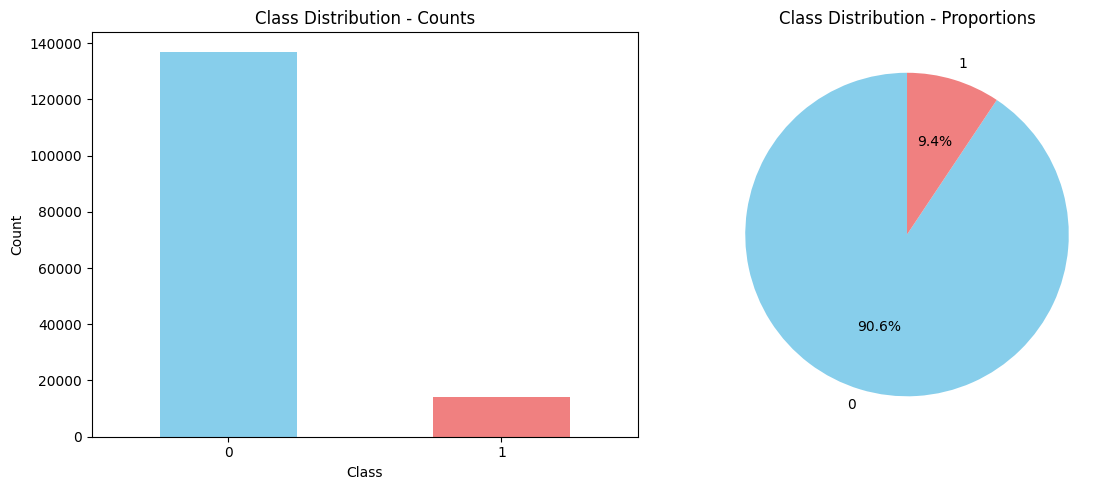


Numerical Features: 4
['user_id', 'purchase_value', 'age', 'ip_address']


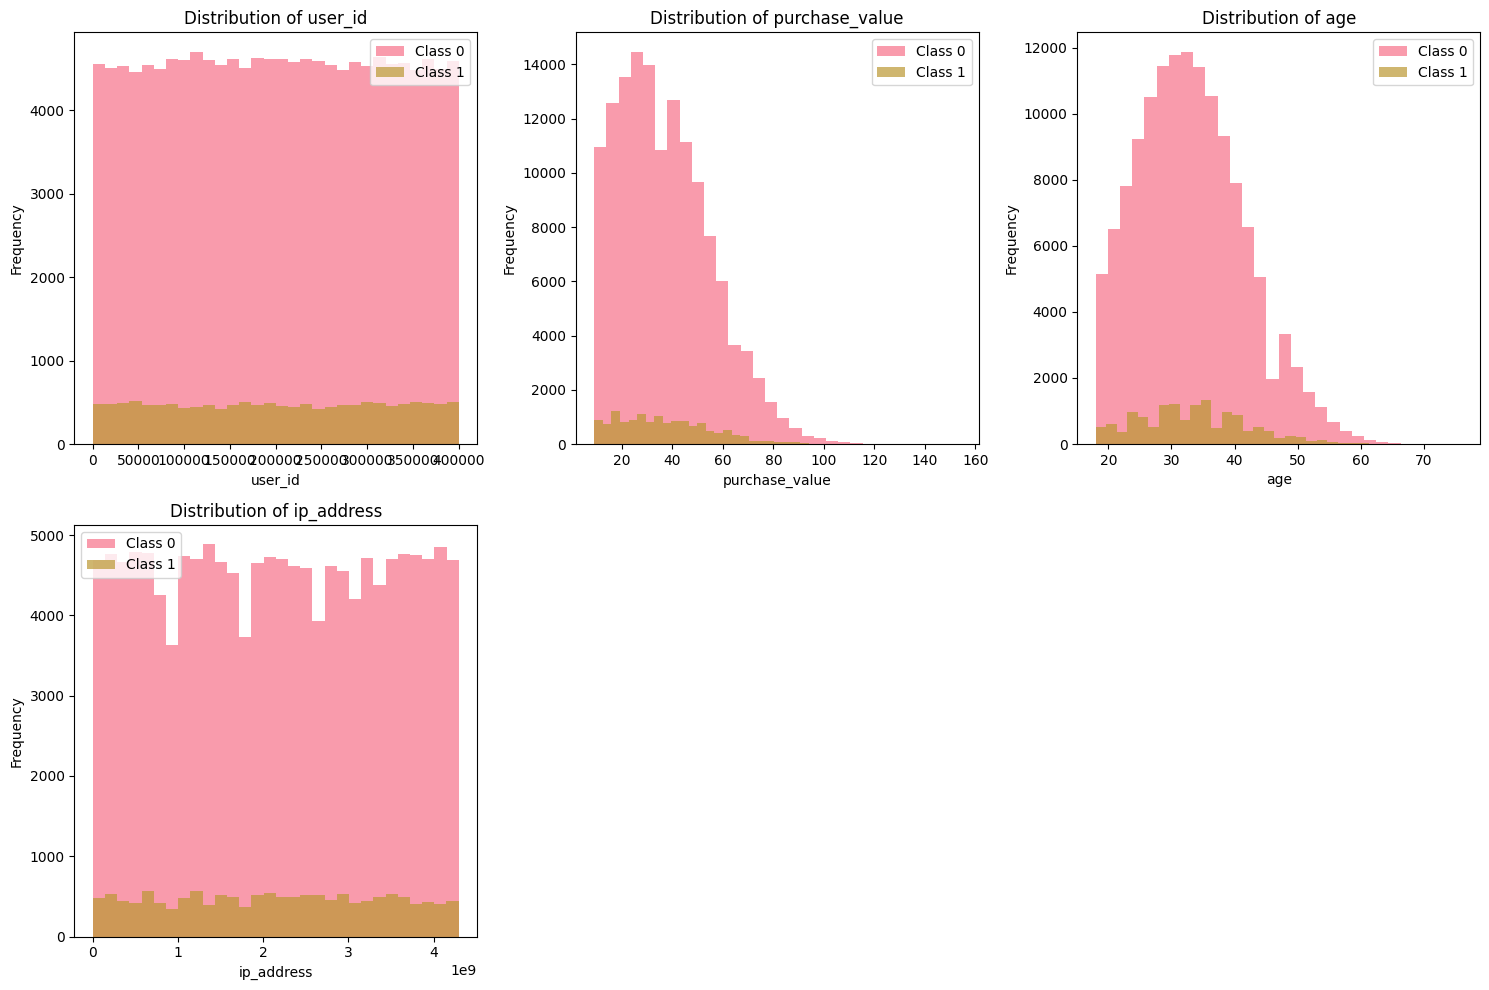

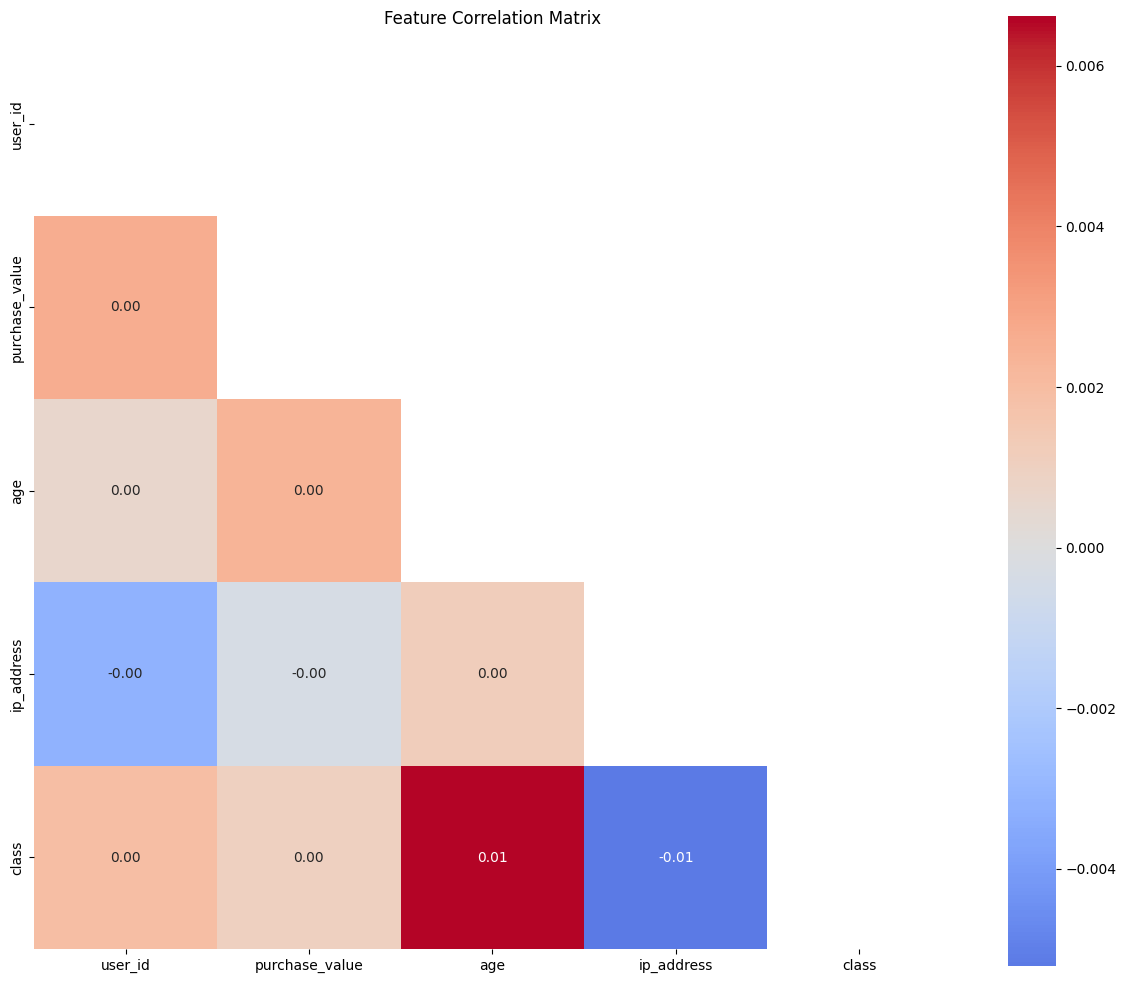


Categorical Features: 4
['device_id', 'source', 'browser', 'sex']


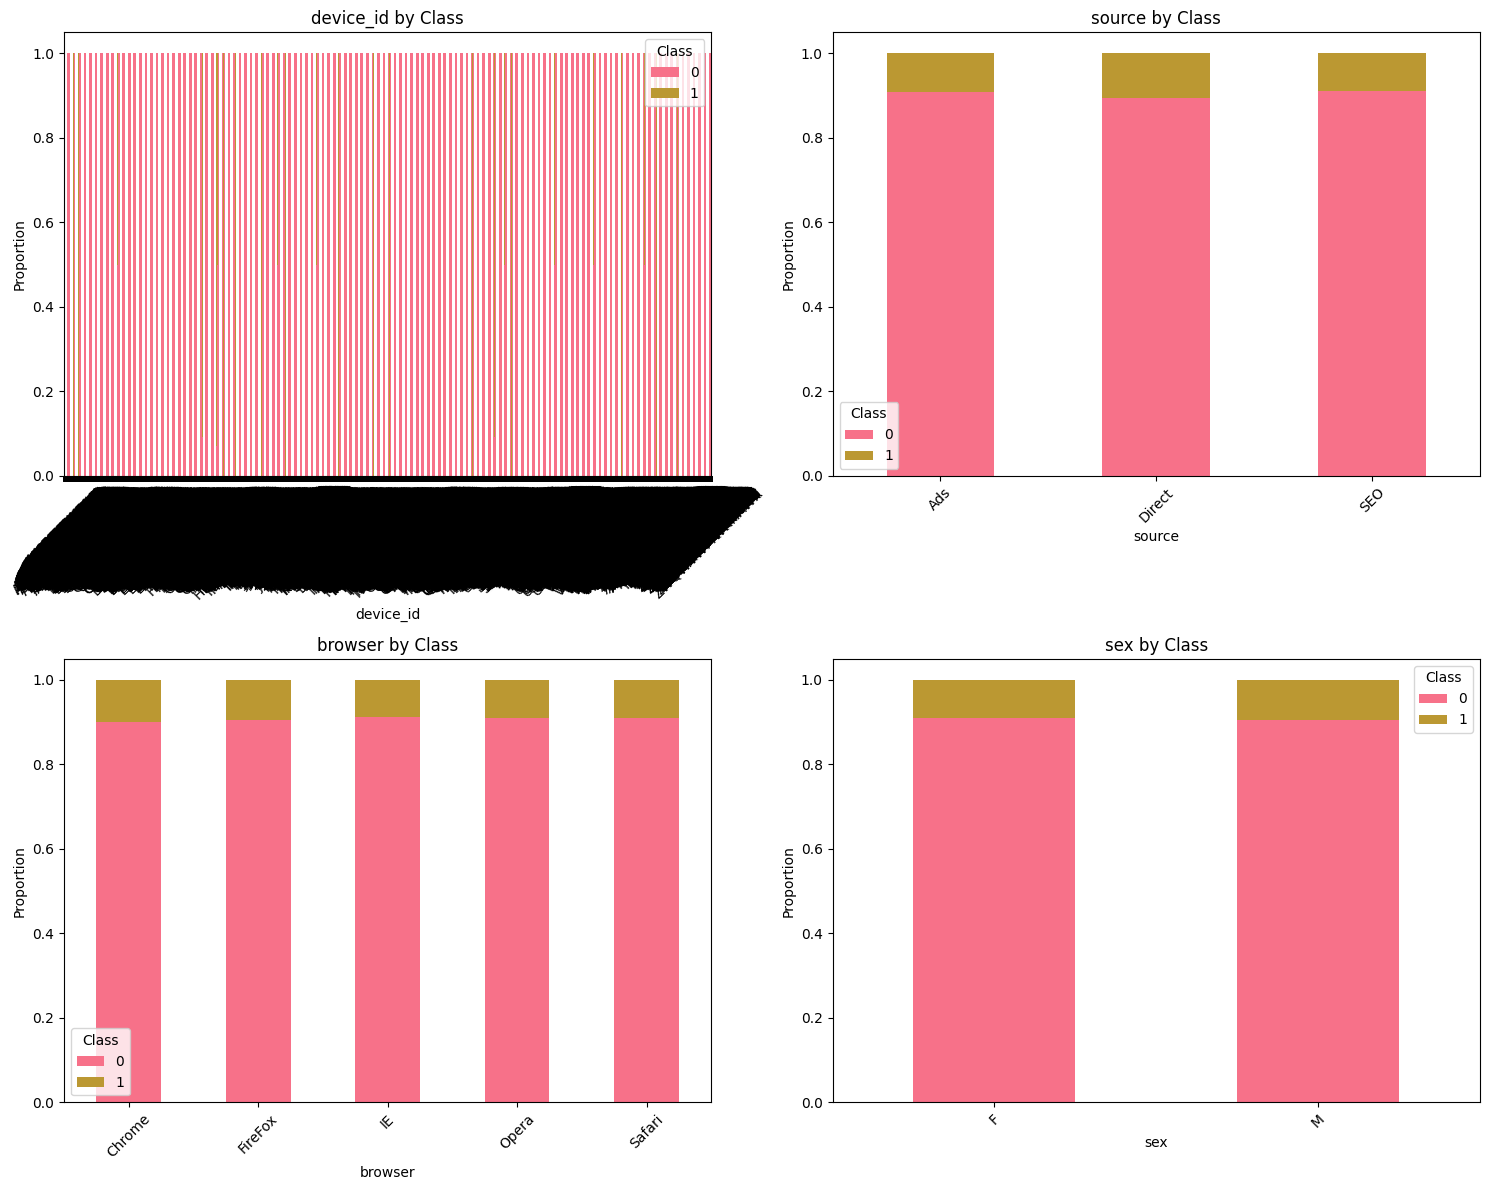


EDA REPORT COMPLETED


In [6]:
# Perform comprehensive EDA
if not fraud_df_clean.empty:
    print("=== EXPLORATORY DATA ANALYSIS ===")
    create_comprehensive_eda_report(fraud_df_clean, target_col='class')
else:
    print("No data available for EDA")

## 4. Feature Engineering {#4-feature-engineering}

In [7]:
# Apply comprehensive feature engineering
if not fraud_df_clean.empty:
    print("=== FEATURE ENGINEERING ===")
    
    # Create all engineered features
    fraud_df_features = create_all_features(fraud_df_clean)
    
    print(f"\nFeature engineering completed!")
    print(f"Original features: {fraud_df_clean.shape[1]}")
    print(f"Total features after engineering: {fraud_df_features.shape[1]}")
    print(f"New features added: {fraud_df_features.shape[1] - fraud_df_clean.shape[1]}")
    
    # Display new feature columns
    new_features = set(fraud_df_features.columns) - set(fraud_df_clean.columns)
    print(f"\nNew features created: {sorted(list(new_features))}")
else:
    print("No data available for feature engineering")

=== FEATURE ENGINEERING ===
Starting comprehensive feature engineering...
Time features created: hour_of_day, day_of_week, time_period, is_weekend
Time since signup calculated (in hours)
Transaction features created for users, devices, and IP addresses
Purchase value features created
Categorical features encoded: ['source', 'browser', 'sex', 'time_period', 'signup_category', 'purchase_category']
Feature engineering complete. Final shape: (151112, 56)

Feature engineering completed!
Original features: 11
Total features after engineering: 56
New features added: 45

New features created: ['browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'day_of_month', 'day_of_week', 'device_avg_transaction', 'device_transaction_count', 'device_user_count', 'hour_of_day', 'ip_avg_transaction', 'ip_transaction_count', 'ip_user_count', 'is_round_amount', 'is_weekend', 'month', 'purchase_category', 'purchase_category_Extreme', 'purchase_category_High', 'purchase_category_Medium', 'purchase

## 5. Geolocation Analysis {#5-geolocation}

In [8]:
# Merge with geolocation data if available
if not fraud_df_features.empty and not ip_country_df.empty:
    print("=== GEOLOCATION ANALYSIS ===")
    
    # Merge with IP-to-country mapping
    fraud_df_geo = merge_with_geolocation(fraud_df_features, ip_country_df)
    
    # Analyze fraud by country
    if 'country' in fraud_df_geo.columns:
        country_fraud_analysis = fraud_df_geo.groupby('country').agg({
            'class': ['count', 'sum', 'mean']
        }).round(4)
        
        country_fraud_analysis.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
        country_fraud_analysis = country_fraud_analysis.sort_values('Fraud_Rate', ascending=False)
        
        print("\nTop 10 countries by fraud rate:")
        display(country_fraud_analysis.head(10))
        
        # Visualize country-based fraud patterns
        plt.figure(figsize=(12, 6))
        top_countries = country_fraud_analysis.head(15)
        plt.bar(range(len(top_countries)), top_countries['Fraud_Rate'])
        plt.xticks(range(len(top_countries)), top_countries.index, rotation=45)
        plt.title('Fraud Rate by Country (Top 15)')
        plt.ylabel('Fraud Rate')
        plt.tight_layout()
        plt.show()
    
    fraud_df_final = fraud_df_geo
else:
    print("Geolocation data not available, proceeding without country information")
    fraud_df_final = fraud_df_features if not fraud_df_features.empty else fraud_df_clean

Geolocation data not available, proceeding without country information


## 6. Handling Class Imbalance {#6-class-imbalance}

In [9]:
# Analyze and handle class imbalance
if not fraud_df_final.empty:
    print("=== CLASS IMBALANCE ANALYSIS ===")
    
    # Analyze current class distribution
    imbalance_handler = ImbalanceHandler()
    class_stats = imbalance_handler.analyze_class_distribution(fraud_df_final['class'])
    
    # Prepare data for modeling
    print("\n=== PREPROCESSING FOR MODELING ===")
    
    # Run full preprocessing pipeline
    processed_data = full_preprocessing_pipeline(
        fraud_df_final, 
        target_col='class',
        sampling_strategy='smote',
        scaling_method='standard'
    )
    
    print("\nPreprocessing completed successfully!")
    print(f"Training set shape: {processed_data['X_train'].shape}")
    print(f"Test set shape: {processed_data['X_test'].shape}")
    print(f"Number of features: {len(processed_data['feature_names'])}")
else:
    print("No data available for preprocessing")

=== CLASS IMBALANCE ANALYSIS ===
Class Distribution Analysis:
Class counts: {0: 136961, 1: 14151}
Class proportions: {0: 0.9063542273280746, 1: 0.09364577267192546}
Imbalance ratio: 9.68
Minority class percentage: 9.36%

=== PREPROCESSING FOR MODELING ===
Starting full preprocessing pipeline...
Preparing features for modeling...
Excluding columns: ['user_id', 'device_id', 'ip_address', 'signup_time', 'purchase_time']
Converting categorical columns to numeric: ['source', 'browser', 'sex', 'time_period', 'signup_category', 'purchase_category']
Final feature matrix shape: (151112, 50)
Target variable shape: (151112,)
Splitting data: 80% train, 20% test
Training set shape: (120889, 50)
Test set shape: (30223, 50)

Training set class distribution:
Class Distribution Analysis:
Class counts: {0: 109568, 1: 11321}
Class proportions: {0: 0.9063521081322535, 1: 0.09364789186774644}
Imbalance ratio: 9.68
Minority class percentage: 9.36%

Test set class distribution:
Class Distribution Analysis:
C

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

## 7. Model Training and Evaluation {#7-modeling}

This section will be expanded in the next phase to include:
- Multiple ML algorithms (Random Forest, XGBoost, Logistic Regression)
- Cross-validation and hyperparameter tuning
- Model evaluation with appropriate metrics for imbalanced data
- Feature importance analysis
- Model interpretability with SHAP

In [ ]:
# Placeholder for model training
print("=== MODEL TRAINING SECTION ===")
print("This section will include:")
print("- Random Forest Classifier")
print("- XGBoost Classifier")
print("- Logistic Regression")
print("- Model evaluation and comparison")
print("- Feature importance analysis")
print("- SHAP explainability")
print("\nTo be implemented in the next phase...")

## 8. Results and Insights {#8-results}

### Key Findings
- Dataset characteristics and quality assessment
- Feature engineering impact on model performance
- Geolocation patterns in fraudulent transactions
- Optimal sampling strategy for class imbalance
- Model performance comparison and recommendations

### Business Recommendations
- Risk scoring implementation
- Real-time monitoring strategies
- Feature importance for business rules
- Cost-benefit analysis of false positives vs false negatives

In [ ]:
# Summary statistics and final insights
if 'processed_data' in locals():
    print("=== PROJECT SUMMARY ===")
    print(f"✓ Data successfully loaded and cleaned")
    print(f"✓ {len(processed_data['feature_names'])} features engineered")
    print(f"✓ Class imbalance handled with SMOTE")
    print(f"✓ Data preprocessed and ready for modeling")
    print(f"\nNext steps: Model training and evaluation")
else:
    print("Please run all previous cells to see the summary")